# Contents:

### 1. Importing Libraries and Data
### 2. The elbow technique
### 3. k-means clustering

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path= r'C:\Users\spada\OneDrive\Data Analytics\World Happiness Report'

In [4]:
df_combined=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_combined.pkl'))

In [6]:
df_combined.shape

(782, 10)

In [8]:
df_combined.head()

country/region  happiness_rank  happiness_score  gdp_per_capita  \
year                                                                     
2015 0    Switzerland               1            7.587         1.39651   
     1        Iceland               2            7.561         1.30232   
     2        Denmark               3            7.527         1.32548   
     3         Norway               4            7.522         1.45900   
     4         Canada               5            7.427         1.32629   

        social_support   health  freedom  trust_in_government  generosity  \
year                                                                        
2015 0         1.34951  0.94143  0.66557              0.41978     0.29678   
     1         1.40223  0.94784  0.62877              0.14145     0.43630   
     2         1.36058  0.87464  0.64938              0.48357     0.34139   
     3         1.33095  0.88521  0.66973              0.36503     0.34699   
     4         1.32261  0.90563  0.63297              0.32957     0.45811   

        year  
year          
2015 0  2015  
     1  2015  
     2  2015  
     3  2015  
     4  2015

In [12]:
#creating a subset of data without categorical columns
df_sub= df_combined[['happiness_rank','happiness_score', 'gdp_per_capita', 'social_support', 'health', 'freedom', 'trust_in_government', 'generosity']]

In [13]:
df_sub

happiness_rank  happiness_score  gdp_per_capita  social_support  \
year                                                                        
2015 0                 1            7.587         1.39651         1.34951   
     1                 2            7.561         1.30232         1.40223   
     2                 3            7.527         1.32548         1.36058   
     3                 4            7.522         1.45900         1.33095   
     4                 5            7.427         1.32629         1.32261   
...                  ...              ...             ...             ...   
2019 151             152            3.334         0.35900         0.71100   
     152             153            3.231         0.47600         0.88500   
     153             154            3.203         0.35000         0.51700   
     154             155            3.083         0.02600         0.00000   
     155             156            2.853         0.30600         0.57500   

           health  freedom  trust_in_government  generosity  
year                                                         
2015 0    0.94143  0.66557              0.41978     0.29678  
     1    0.94784  0.62877              0.14145     0.43630  
     2    0.87464  0.64938              0.48357     0.34139  
     3    0.88521  0.66973              0.36503     0.34699  
     4    0.90563  0.63297              0.32957     0.45811  
...           ...      ...                  ...         ...  
2019 151  0.61400  0.55500              0.41100     0.21700  
     152  0.49900  0.41700              0.14700     0.27600  
     153  0.36100  0.00000              0.02500     0.15800  
     154  0.10500  0.22500              0.03500     0.23500  
     155  0.29500  0.01000              0.09100     0.20200  

[782 rows x 8 columns]

# 2. The Elbow Technique

In [22]:
num_cl = range(1,6)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

#### Notes: A range of 1-6 clusters was chosen because the dataset I am working with is not very large, with only 782 rows and 8 columns.

In [23]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

score

C:\Users\spada\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1595664.78774076,
 -399142.3931733142,
 -177588.31430141145,
 -100007.8380764321,
 -64315.666009398294]

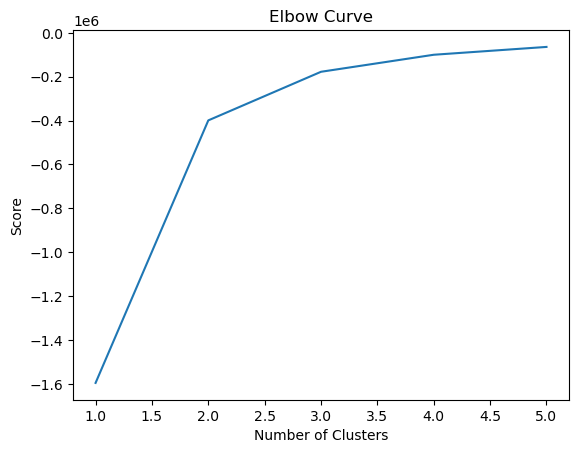

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Notes: In this graph above, we can see that the number of clusters that would best fit this dataset is 2-3 since it hits 2 and slowly rises to 3 where the rate of increase gradually slows and evens out.

# 3. k-means Clustering

In [25]:
#Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=3)

In [27]:
# adding a column with the resulting clusters
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\spada\AppData\Local\Temp\ipykernel_7372\1156879746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [28]:
df_sub.head()

happiness_rank  happiness_score  gdp_per_capita  social_support  \
year                                                                      
2015 0               1            7.587         1.39651         1.34951   
     1               2            7.561         1.30232         1.40223   
     2               3            7.527         1.32548         1.36058   
     3               4            7.522         1.45900         1.33095   
     4               5            7.427         1.32629         1.32261   

         health  freedom  trust_in_government  generosity  clusters  
year                                                                 
2015 0  0.94143  0.66557              0.41978     0.29678         1  
     1  0.94784  0.62877              0.14145     0.43630         1  
     2  0.87464  0.64938              0.48357     0.34139         1  
     3  0.88521  0.66973              0.36503     0.34699         1  
     4  0.90563  0.63297              0.32957     0.45811         1

In [29]:
# seeing how many are in each cluster
df_sub['clusters'].value_counts()

1    265
2    260
0    257
Name: clusters, dtype: int64

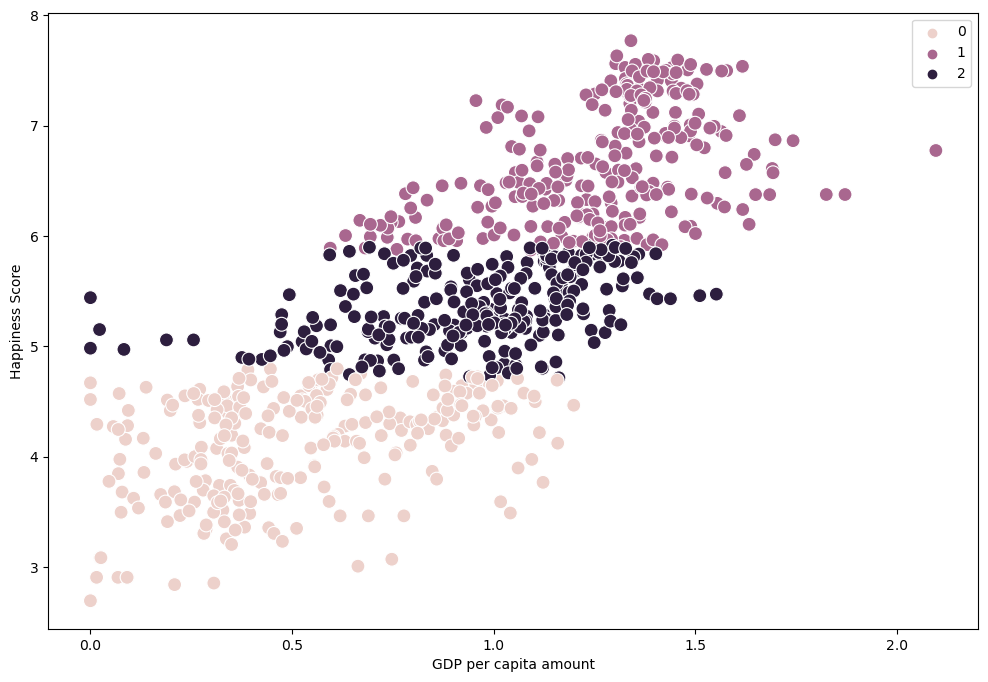

In [31]:
# Plot the clusters for the "happiness score" and "gdp per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gdp_per_capita'], y=df_sub['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('GDP per capita amount')
plt.ylabel('Happiness Score')
plt.show()

#### Notes: The first cluster (0's) marked by pink dots, gathers data points with very low GDP per capita and happiness score. This cluster is the most spread out of the three.
#### The second cluster (2's) marked by dark purple dots, includes data with a higher GDP per capita and also a higher happiness score. Out of all three of the clusters, this one is the most compact, although it does have 6 dots a bit lower on the GDP per capita scale than most.
#### The third cluster (1's) marked by light purple dots, gathers data with high happiness scores and also average to higher GDP per capita. This is the most dense cluster, although, not by much.

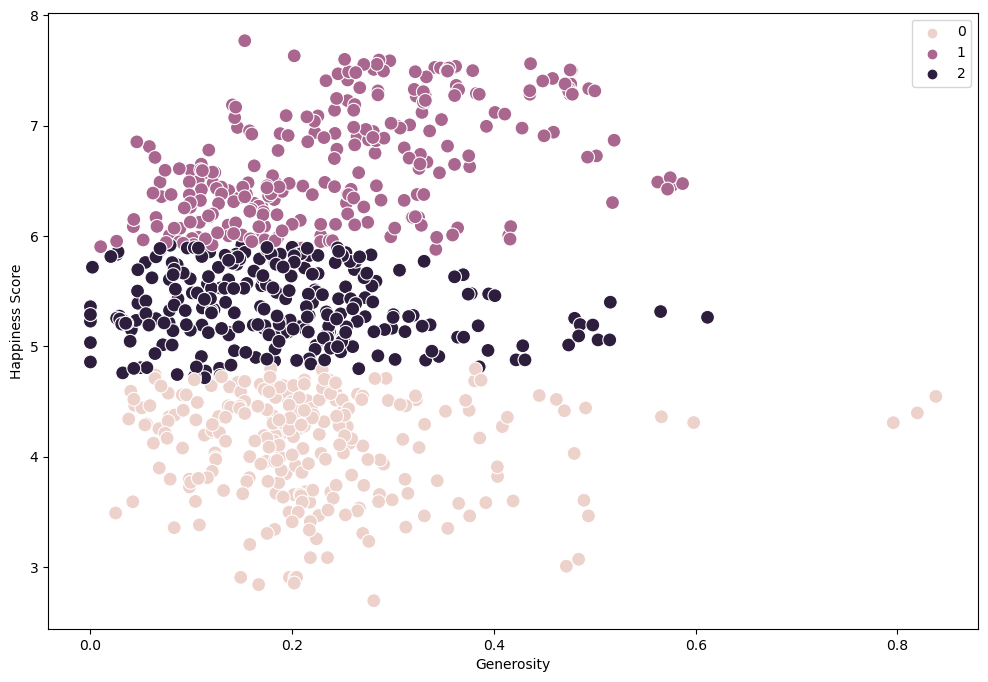

In [33]:
# Plot the clusters for the "happiness score" and "generosity" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['generosity'], y=df_sub['happiness_score'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()

#### Notes: This combination of these two variables (generosity and happiness score) do not really work well in this cluster scatterplot because there is not a significant corrleation between them. The points of data within all three clusters are distributed quite similarly throughout the generosity scale and the happiness score does not increase/decrease as the generosity level increases or decreases.  I would not use this scatterplot to show a correlation or clustering.

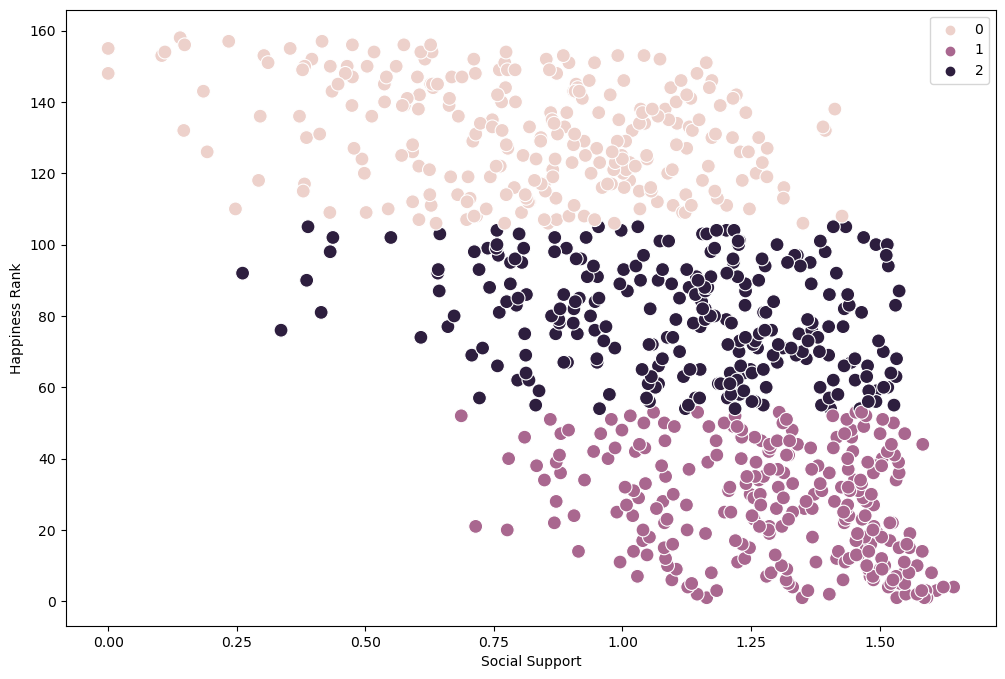

In [34]:
# Plot the clusters for the "happiness rank" and "social support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['social_support'], y=df_sub['happiness_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('Happiness Rank')
plt.show()

#### Notes: This scatterplot shows a negative correlation. The first cluster, in light purple (1's) represents a high level of social support and a low happiness rank. This is proving that the more social support someone has, the more happy they are.
#### The second cluster, in dark purple (2's), includes points with a little less social support and a higher happiness rank than the first cluster, but lower on average than the third cluster.
#### The third cluster, in pink (0's), contains the highest happiness rank points and the overall least amount of social support reported.

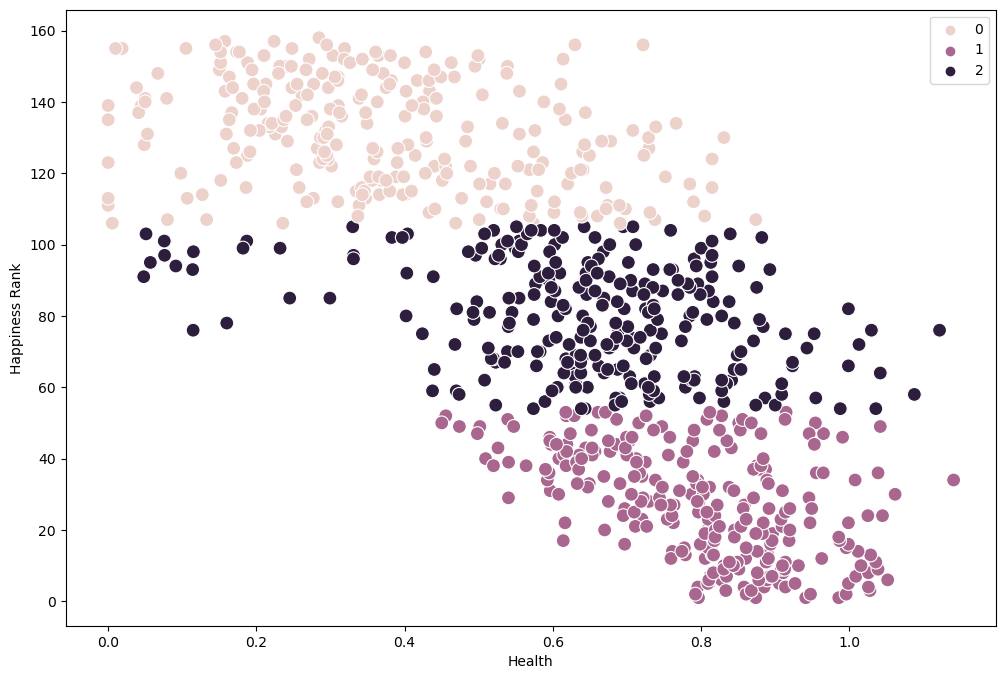

In [35]:
# Plot the clusters for the "happiness rank" and "health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['health'], y=df_sub['happiness_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Health')
plt.ylabel('Happiness Rank')
plt.show()

#### Notes: The scatterplot above showing the clusters between health and happiness rank has been divided into 3 clusters. The light purple (1's)  shows ratings high in health and low on the happiness rank. 
#### The second cluster of dark purple (2's) has health ratings slightly less than the light purple, but still on the high end with some reaching over to the lower numbers of 0.3 and below. With the dark purple cluster, the happiness rank has jumped up quite a bit from the light purple cluster.
#### The third cluster of pink (0's) are at the top of the happiness rank scale and do not extend below 100. The pink cluster has the widest range on the health scale and extends from 0.0 up to just above 0.8. Most of the points are located between 0.0 and 0.6.

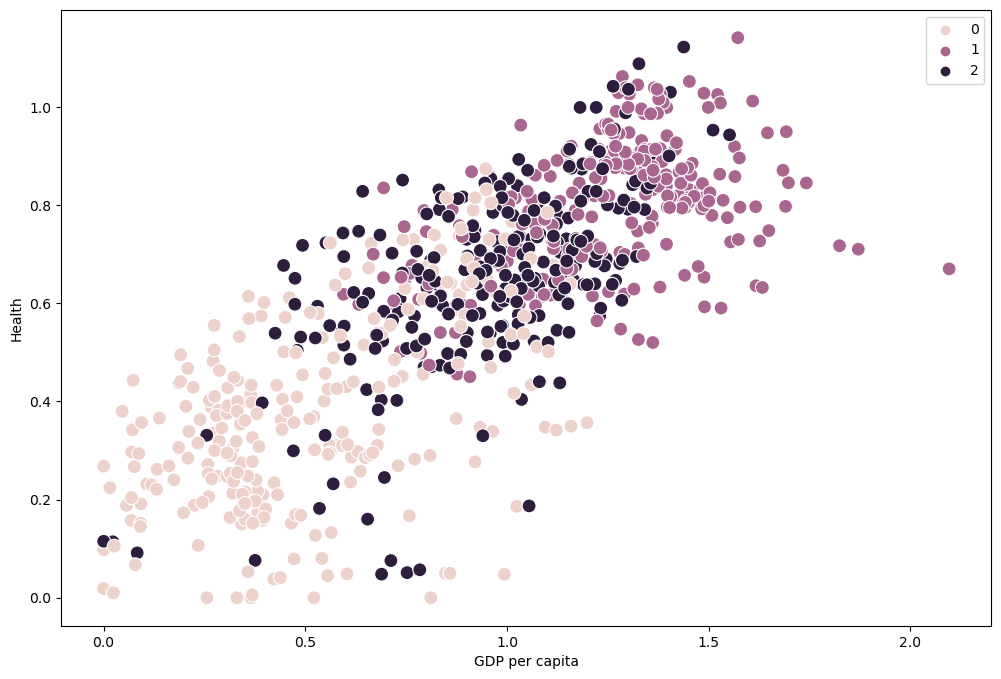

In [36]:
# Plot the clusters for the "gdp_per_capita" and "health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gdp_per_capita'], y=df_sub['health'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('GDP per capita')
plt.ylabel('Health')
plt.show()

#### Notes: Although this scatterplot shows a positive correlation between the two variables (health and gdp per capita), the way that this data was clustered does not make sense. The assigned clusters have random points throughout the entire correlation and do not seem to be grouped together like a cluster should be.

In [38]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [39]:
#Descriptive Stats for Clusters
df_sub.groupby('cluster').agg({'gdp_per_capita':['mean', 'median'], 
                         'generosity':['mean', 'median'], 
                         'health':['mean', 'median'],
                          'happiness_rank':['mean', 'median'],
                              'happiness_score':['mean','median'],
                              'social_support':['mean','median']})

gdp_per_capita           generosity              health            \
                      mean    median       mean    median      mean    median   
cluster                                                                         
dark purple       0.953349  0.995769   0.190609  0.182425  0.650894  0.660785   
pink              0.520847  0.460380   0.219466  0.202000  0.378281  0.357000   
purple            1.262720  1.305000   0.245152  0.241800  0.801730  0.814870   

            happiness_rank        happiness_score         social_support  \
                      mean median            mean  median           mean   
cluster                                                                    
dark purple      79.492308   79.5        5.352827  5.3025       1.115724   
pink            131.206226  131.0        4.107362  4.2180       0.813200   
purple           26.996226   27.0        6.637981  6.5050       1.298952   

                       
               median  
cluster                
dark purple  1.160419  
pink         0.850000  
purple       1.323000

#### Notes: The purple clusters has the best stats in almost all of the categories, while the pink clusters has the lowest stats in almost all of the categories.
#### The median happiness rank is significanly lower within the purple clusters, compared to the other two. A lower happiness rank means more happy.
#### Generosity does not seem to matter much. The stats are very low throughout all three clusters compared to others.
#### Seeing how high the mean and median are for both gdp_per_capita and social_support shows how important these are for the happiness of an individual.

### Since steps of consistency, cleaning, correlations, regressions, clustering, etc have been done to this data, these results could be useful in future steps of an analytics pipeline because they would provide quality and quick insights into multiple variables within the dataset.